In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# datasources
DATA_DIR = '/Users/datatron/PycharmProjects/aa228/project2/data'
SMALL = DATA_DIR + '/small.csv'
MEDIUM = DATA_DIR + '/medium.csv'
LARGE = DATA_DIR + '/large.csv'

In [2]:
# medium
med_data = pd.read_csv(MEDIUM)
med_data['vel'] = med_data.s // 500
med_data['pos'] = med_data.s % 500 - 1
med_data['vel_p'] = med_data.sp // 500
med_data['pos_p'] = med_data.sp % 500 - 1
med_data['d_pos'] = med_data.pos - med_data.pos_p
med_data['d_vel'] = med_data.vel - med_data.vel_p

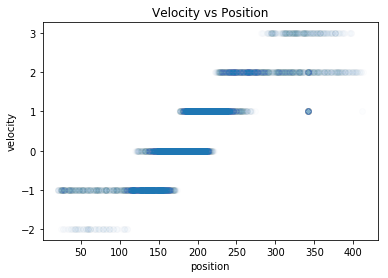

In [5]:
def plot_pos_vel(data, alpha=0.01):
    plt.scatter(data.pos, data.d_vel, alpha=alpha)
    plt.xlabel('position')
    plt.ylabel('velocity')
    plt.title('Velocity vs Position')
#     if alpha > 0.1:
#         plt.colorbar()
    plt.show()

plot_pos_vel(med_data[(med_data.pos>20) & (med_data.a == 1)])
# plot_pos_vel(med_data[med_data.pos > 450], alpha=0.8)

In [3]:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

filtered = med_data[med_data.pos < 450]

trace1 = go.Scatter3d(
    x=filtered.pos,
    y=filtered.vel,
    z=filtered.d_pos,
    mode='markers',
    marker=dict(
        size=3,
        color=filtered.r,       
        colorscale='Viridis',   
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')